# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



# TASK #1: PROJECT OVERVIEW 


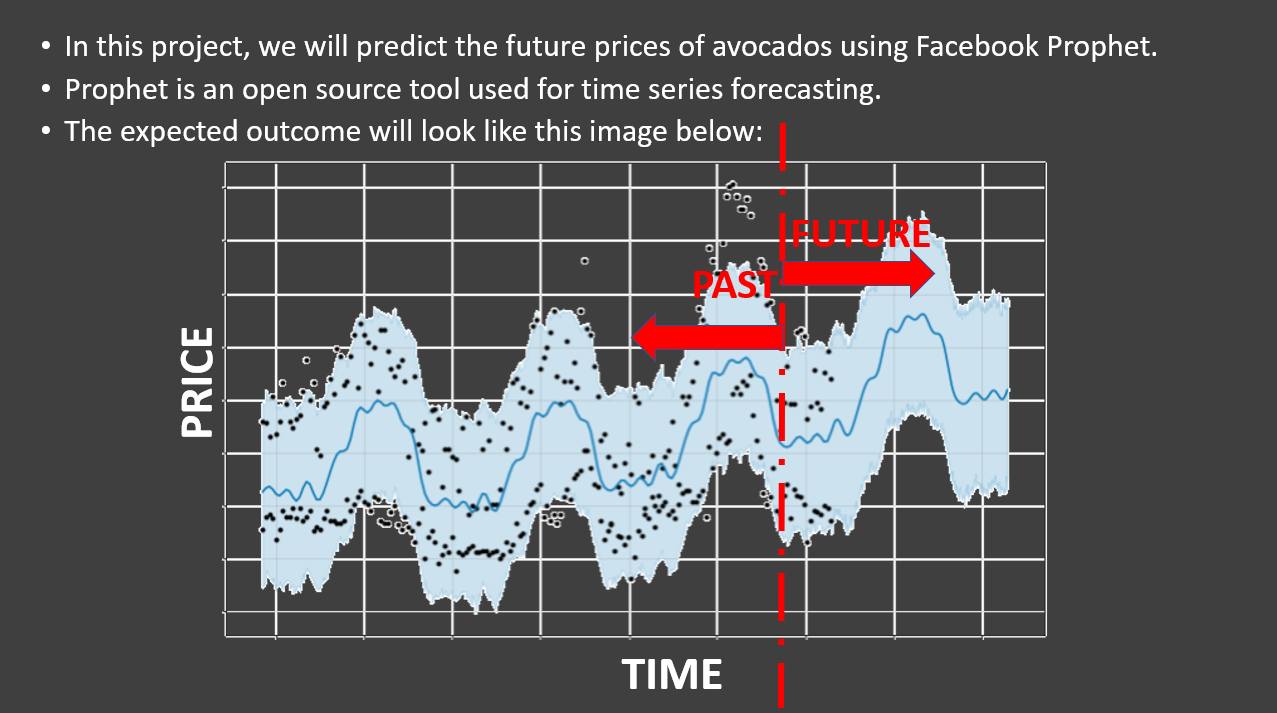


# TASK #2: IMPORT LIBRARIES AND DATASET

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet



In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [2]:
# dataframes creation for both training and testing datasets 
df =pd.read_csv('avocado.csv')


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [3]:
# Let's view the head of the training dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Let's view the last elements in the training dataset
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.shape

(18249, 14)

# TASK #3: EXPLORE DATASET  

In [9]:
df = df.sort_values('Date')

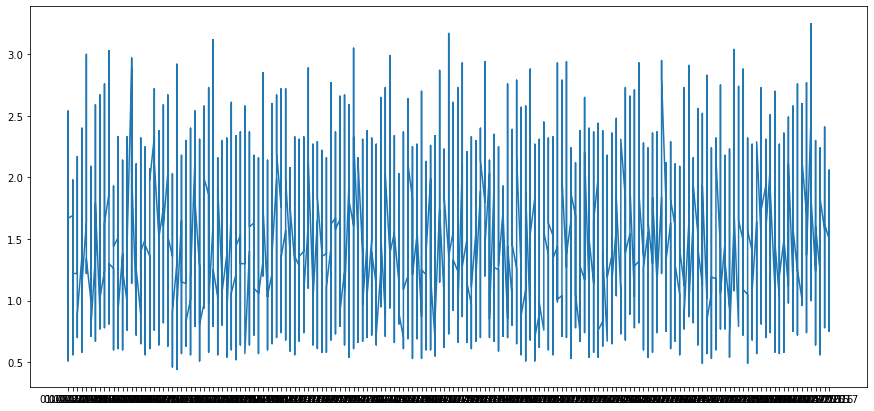

In [10]:
# Plot date and average price
plt.figure(figsize = (15,7))
plt.plot(df['Date'],df['AveragePrice'])

<AxesSubplot:xlabel='AveragePrice'>

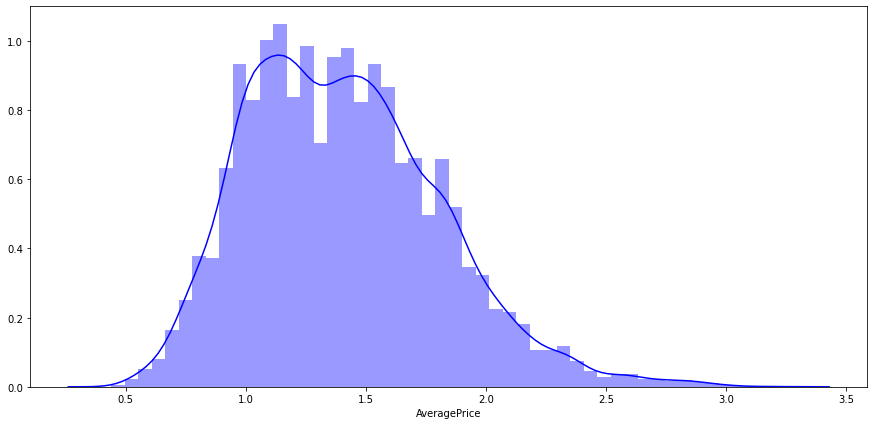

In [11]:
# Plot distribution of the average price
plt.figure(figsize = (15,7))
sns.distplot(df['AveragePrice'],color = 'b')

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

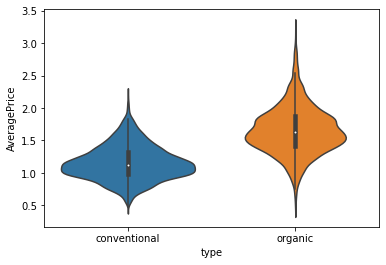

In [12]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot( y = 'AveragePrice',x='type',data=df )


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Pittsburgh'),
  Text(1, 0, 'PhoenixTucson'),
  Text(2, 0, 'Houston'),
  Text(3, 0, 'RichmondNorfolk'),
  Text(4, 0, 'GrandRapids'),
  Text(5, 0, 'Atlanta'),
  Text(6, 0, 'Spokane'),
  Text(7, 0, 'Albany'),
  Text(8, 0, 'GreatLakes'),
  Text(9, 0, 'HartfordSpringfield'),
  Text(10, 0, 'Plains'),
  Text(11, 0, 'West'),
  Text(12, 0, 'Portland'),
  Text(13, 0, 'HarrisburgScranton'),
  Text(14, 0, 'BaltimoreWashington'),
  Text(15, 0, 'California'),
  Text(16, 0, 'RaleighGreensboro'),
  Text(17, 0, 'Roanoke'),
  Text(18, 0, 'SanFrancisco'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'WestTexNewMexico'),
  Text(21, 0, 'Southeast'),
  Text(22, 0, 'Detroit'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'Sacramento'),
  Text(25, 0, 'Syr

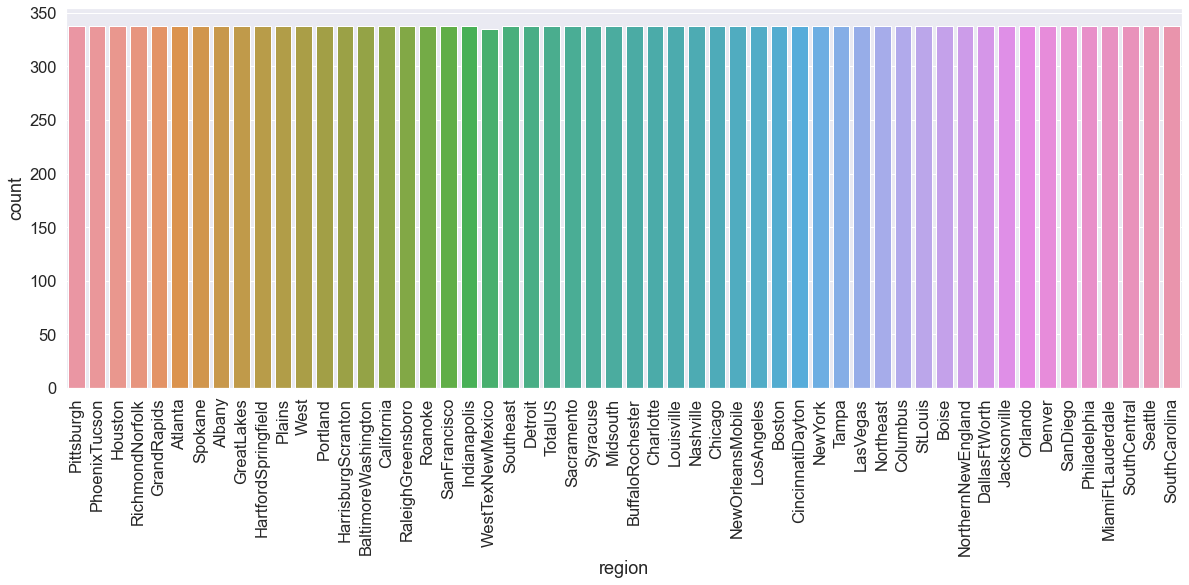

In [13]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=1.5) 
plt.figure(figsize=[20,7])
sns.countplot(x = 'region', data = df)
plt.xticks(rotation = 90)


(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

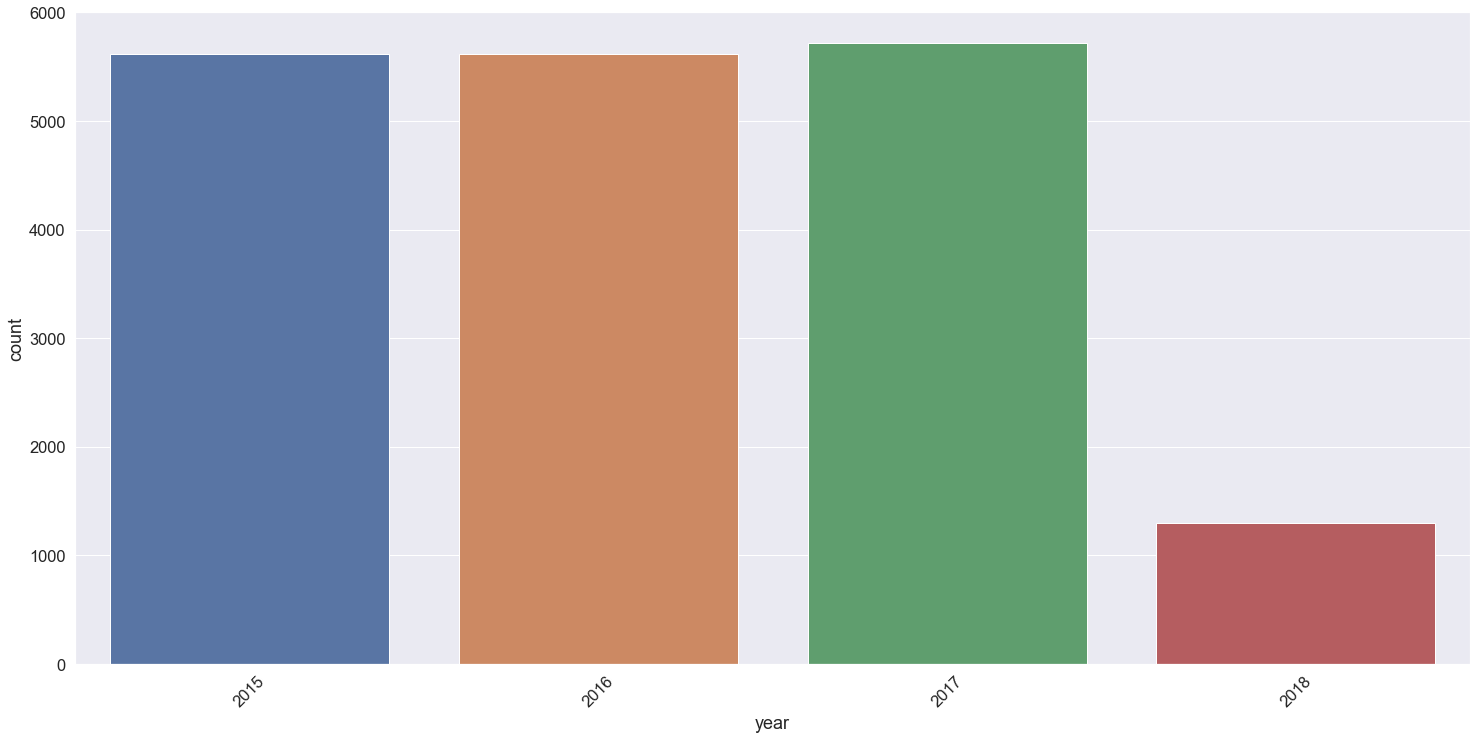

In [14]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)

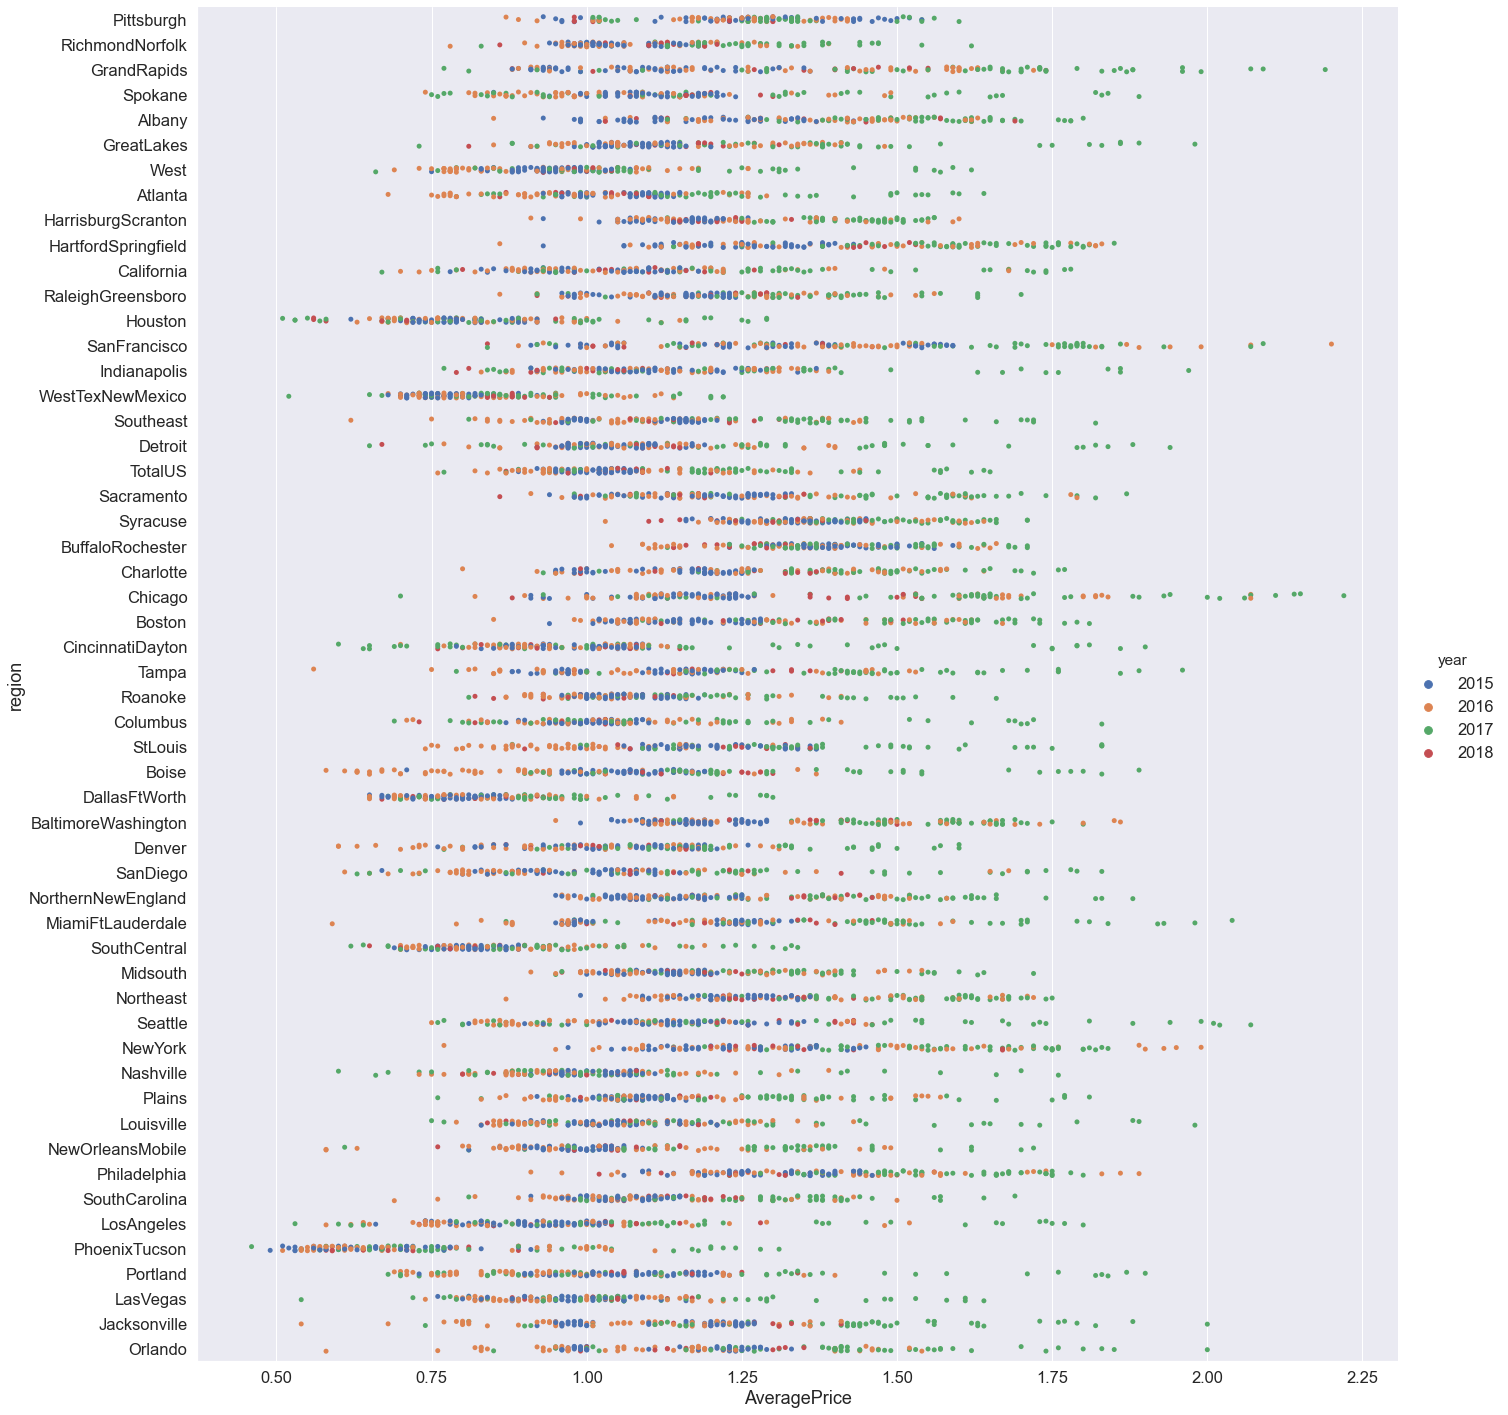

In [15]:
 # plot the avocado prices vs. regions for conventional avocados
conv =sns.catplot('AveragePrice','region',data =df[df['type']== 'conventional'],hue = 'year',height = 20)

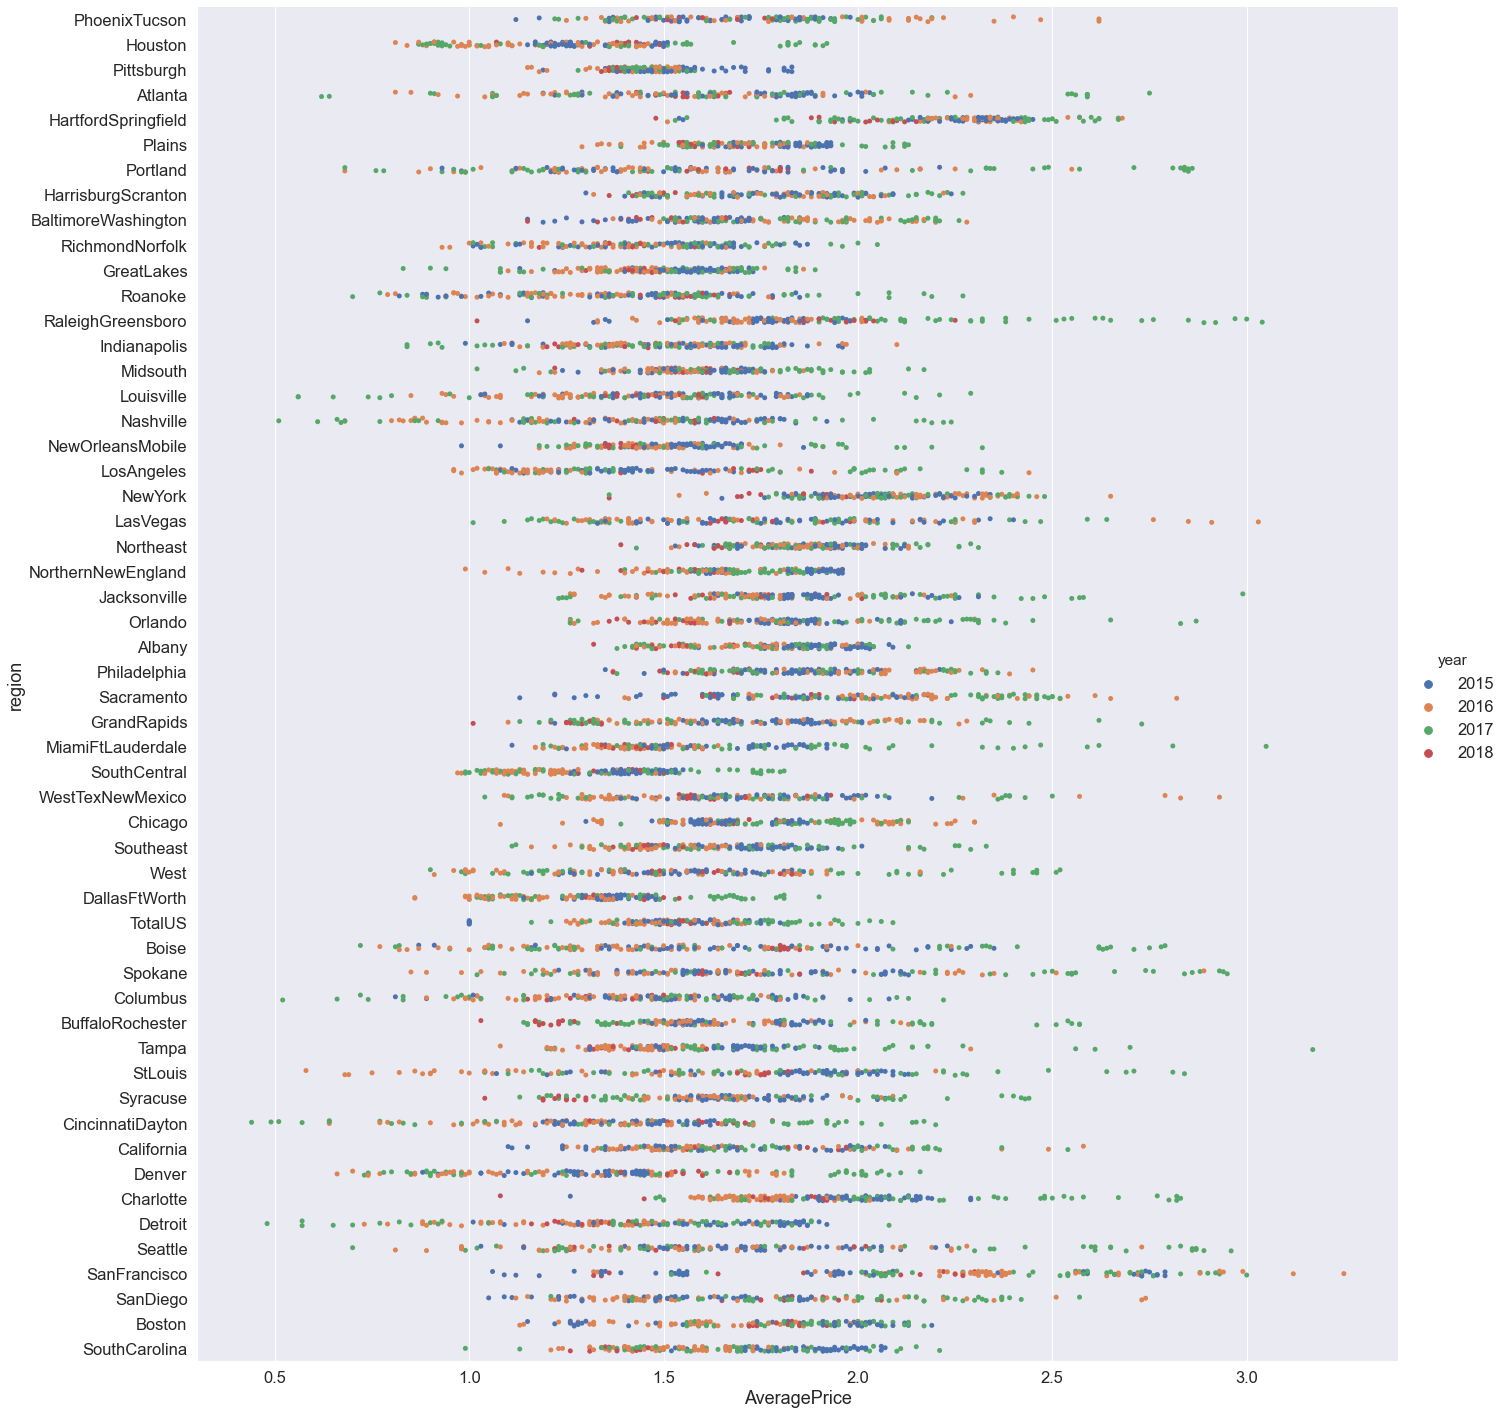

In [16]:
  # plot the avocado prices vs. regions for organic avocados

conv =sns.catplot('AveragePrice','region',data =df[df['type']== 'organic'],hue = 'year',height = 20)

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [17]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7470,52,01-01-2017,1.02,141043.91,58724.08,42203.79,2553.37,37562.67,28298.47,9264.20,0.00,conventional,2017,Pittsburgh
16542,52,01-01-2017,1.88,7740.98,2155.99,3030.64,1.20,2553.15,2547.83,5.32,0.00,organic,2017,PhoenixTucson
15747,52,01-01-2017,1.40,10109.46,7550.89,58.71,0.00,2499.86,2499.86,0.00,0.00,organic,2017,Houston
7682,52,01-01-2017,1.11,240752.75,82444.88,85577.58,5485.61,67244.68,65961.19,1104.32,179.17,conventional,2017,RichmondNorfolk
6410,52,01-01-2017,0.77,306129.40,1217.67,224774.25,7582.69,72554.79,68737.04,3714.24,103.51,conventional,2017,GrandRapids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7736,0,31-12-2017,1.03,578374.50,130774.36,396250.81,922.03,50427.30,46215.90,521.92,3689.48,conventional,2017,Sacramento
16278,0,31-12-2017,1.66,229313.64,11281.04,33549.86,122.83,184359.91,170878.67,13481.24,0.00,organic,2017,Northeast
6199,0,31-12-2017,0.90,1116393.20,481105.48,307423.18,4818.24,323046.30,161254.88,161616.45,174.97,conventional,2017,DallasFtWorth
7577,0,31-12-2017,0.92,419590.58,90432.19,134861.05,5994.91,188302.43,178330.99,9970.33,1.11,conventional,2017,RaleighGreensboro


In [27]:
df_prophet =df[['Date','AveragePrice']]

In [28]:
df_prophet = df_prophet.rename(columns = {'Date': 'ds','AveragePrice':'y'})

In [29]:
df_prophet

,ds,y
7470,01-01-2017,1.02
16542,01-01-2017,1.88
15747,01-01-2017,1.40
7682,01-01-2017,1.11
6410,01-01-2017,0.77
...,...,...
7736,31-12-2017,1.03
16278,31-12-2017,1.66
6199,31-12-2017,0.90
7577,31-12-2017,0.92


# TASK 5: UNDERSTAND INTUITION BEHIND FACEBOOK PROPHET

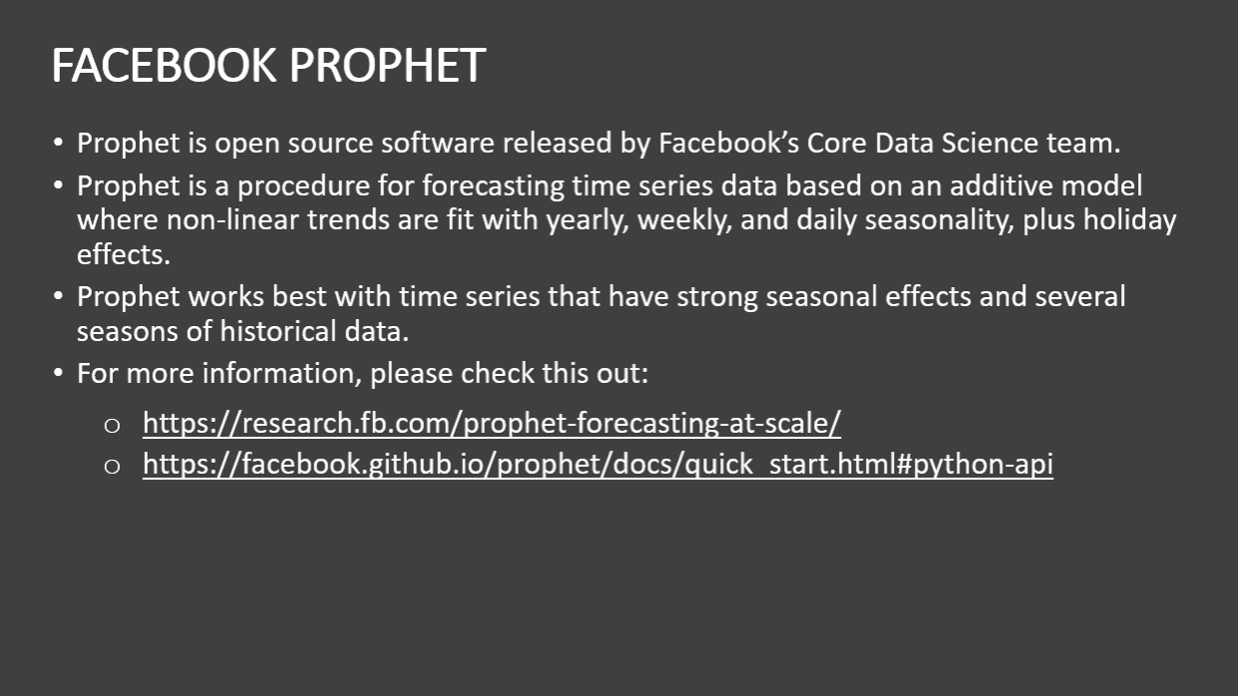

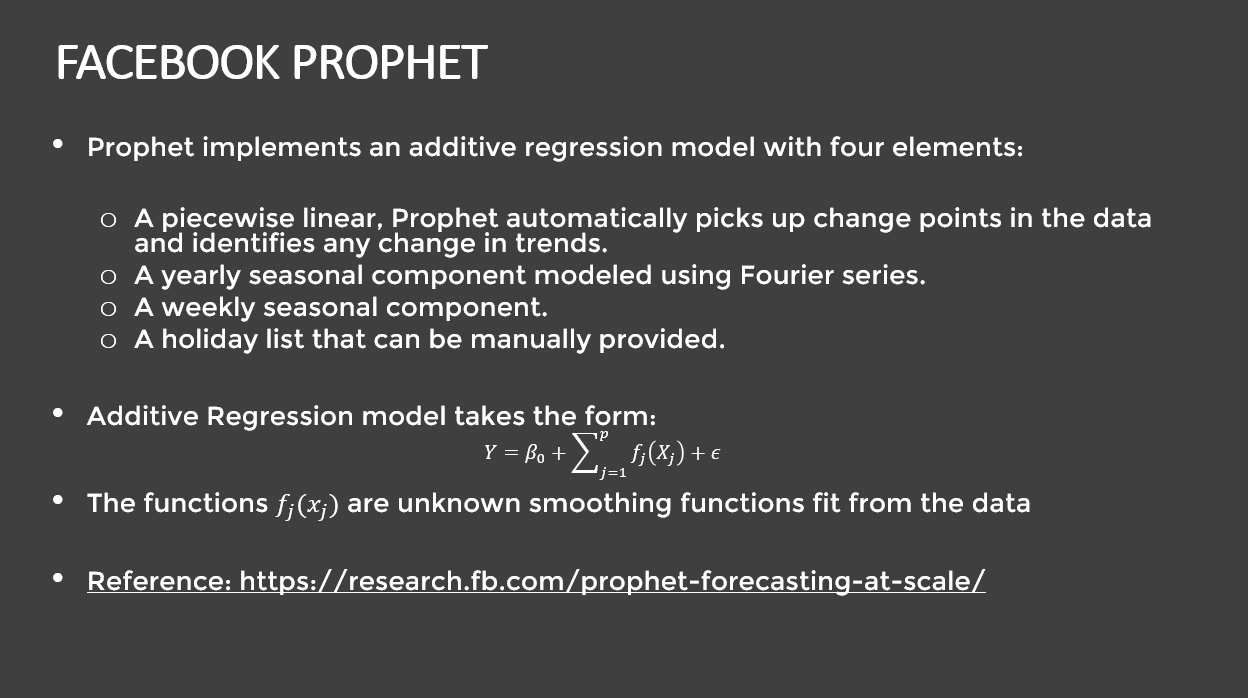

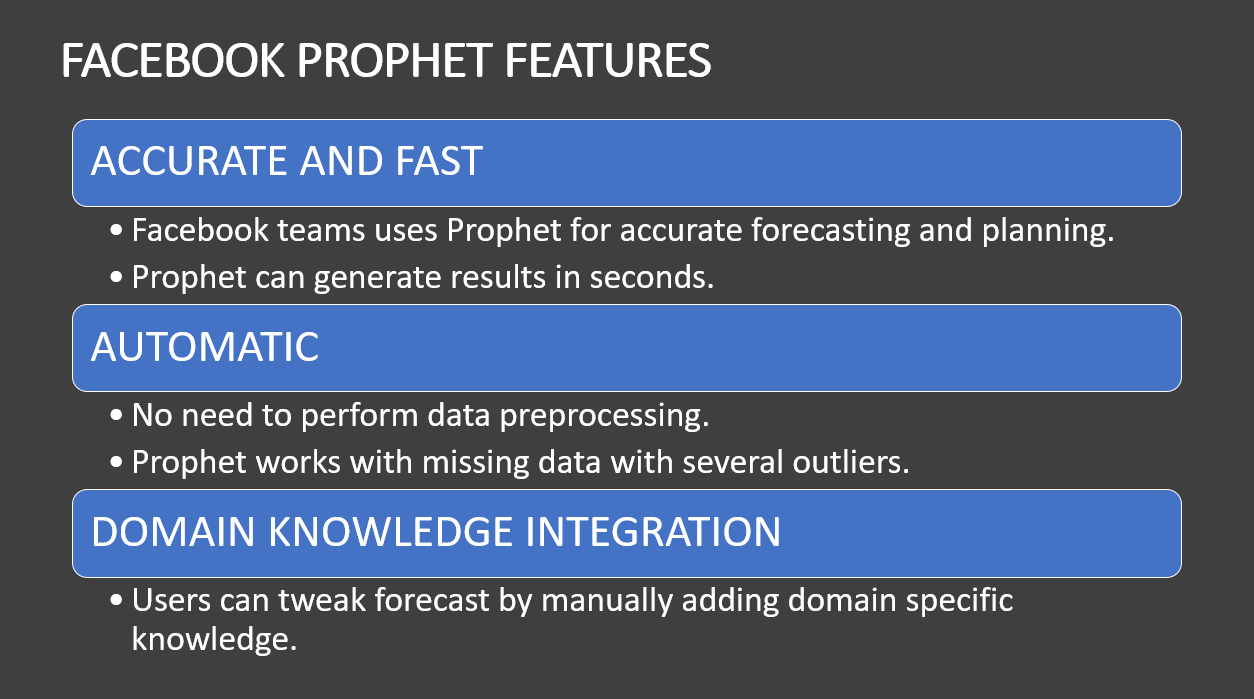

# TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [30]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [31]:
# Forcasting into the future
future = m.make_future_dataframe(periods = 365)
forcast = m.predict(future)

In [32]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,1.414581,0.821600,1.830341,1.414581,1.414581,-0.108918,-0.108918,-0.108918,-0.039603,-0.039603,-0.039603,-0.069315,-0.069315,-0.069315,0.0,0.0,0.0,1.305663
1,2015-01-02,1.414581,0.798159,1.845914,1.414581,1.414581,-0.108918,-0.108918,-0.108918,-0.039603,-0.039603,-0.039603,-0.069315,-0.069315,-0.069315,0.0,0.0,0.0,1.305663
2,2015-01-02,1.414581,0.807192,1.793461,1.414581,1.414581,-0.108918,-0.108918,-0.108918,-0.039603,-0.039603,-0.039603,-0.069315,-0.069315,-0.069315,0.0,0.0,0.0,1.305663
3,2015-01-02,1.414581,0.850838,1.867731,1.414581,1.414581,-0.108918,-0.108918,-0.108918,-0.039603,-0.039603,-0.039603,-0.069315,-0.069315,-0.069315,0.0,0.0,0.0,1.305663
4,2015-01-02,1.414581,0.838514,1.832662,1.414581,1.414581,-0.108918,-0.108918,-0.108918,-0.039603,-0.039603,-0.039603,-0.069315,-0.069315,-0.069315,0.0,0.0,0.0,1.305663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,2019-10-30,0.944141,0.537081,1.514213,0.864168,1.022039,0.097155,0.097155,0.097155,-0.031539,-0.031539,-0.031539,0.128694,0.128694,0.128694,0.0,0.0,0.0,1.041297
18610,2019-10-31,0.943389,0.668529,1.682595,0.863036,1.021607,0.221144,0.221144,0.221144,0.094316,0.094316,0.094316,0.126827,0.126827,0.126827,0.0,0.0,0.0,1.164533
18611,2019-11-01,0.942637,0.529816,1.520987,0.861947,1.021154,0.084166,0.084166,0.084166,-0.039603,-0.039603,-0.039603,0.123769,0.123769,0.123769,0.0,0.0,0.0,1.026803
18612,2019-11-02,0.941885,0.484112,1.538398,0.861003,1.020718,0.077742,0.077742,0.077742,-0.041854,-0.041854,-0.041854,0.119596,0.119596,0.119596,0.0,0.0,0.0,1.019626


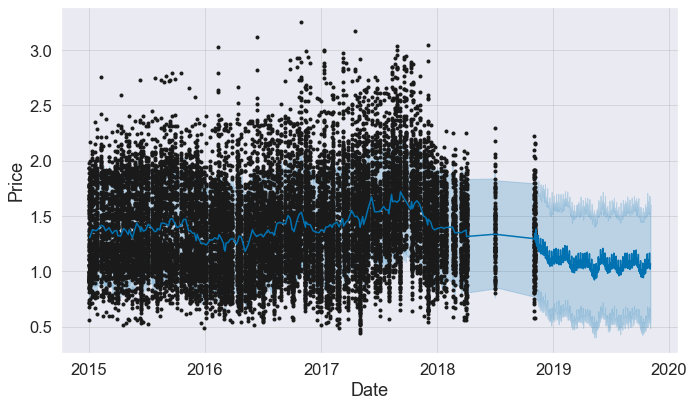

In [41]:
fig1= m.plot(forcast, xlabel='Date' , ylabel ='Price')

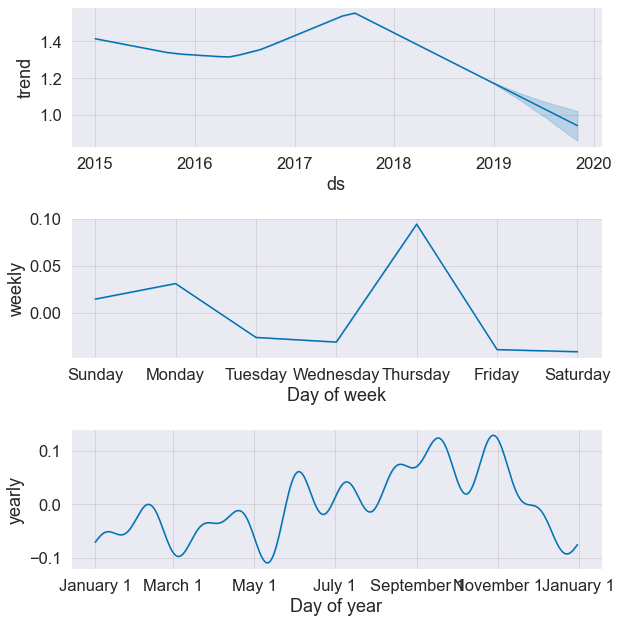

In [36]:
fig2 = m.plot_components(forcast)

# TASK 7: DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B

In [52]:
# dataframes creation for both training and testing datasets 
df = pd.read_csv('avocado.csv')


In [57]:
# Select specific region
df_sample = df[df['region']=='West']

In [58]:
df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,27-12-2015,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,20-12-2015,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,13-12-2015,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,06-12-2015,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,29-11-2015,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,04-02-2018,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,28-01-2018,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,21-01-2018,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,14-01-2018,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


In [59]:
df_sample = df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


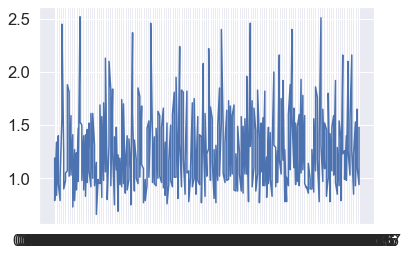

In [60]:
plt.plot(df_sample['Date'],df_sample['AveragePrice'])

In [64]:
df_sample = df_sample.rename(columns = {'Date' : 'ds','AveragePrice' :'y'})

In [65]:
m = Prophet()
m.fit(df_sample)
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


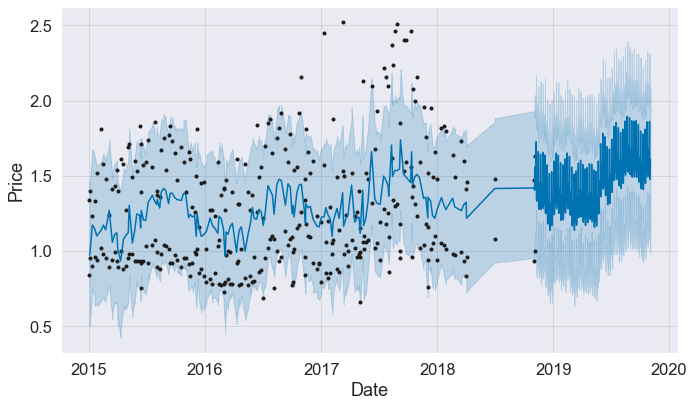

In [66]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

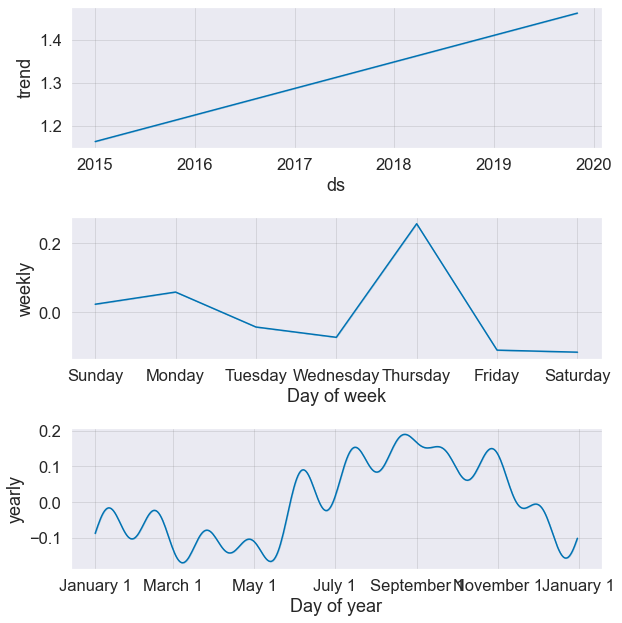

In [67]:
figure3 = m.plot_components(forecast)

# Credit

In [68]:
![image.png](attachment:image.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.
